# Model Project

**Table of contents**<a id='toc0_'></a>  
- [1. Objective](#toc1_)
- [2. Import of packages](#toc2_)
- [3. Model description](#toc3_)
- [4. Analytical solution](#toc4_)
- [5. Numerical solution](#toc5_)
- [6. Further analysis](#toc6_)
- [7. Concluding remarks](#toc7_)

## 1. <a id='toc1_'></a>[Objectives](#toc1_)

This notebook examines the OLG model, and look at how population growth affects the outcome of the model.

## 2. <a id='toc2_'></a>[Import of packages](#toc2_)

In [10]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import pandas as pd
from ipywidgets import interact

%load_ext autoreload
%autoreload 2

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3. <a id='toc3_'></a>[Model description](#toc3_)

## The OLG Model 

The OLG model consists of 2 periods and 2 groups, young and old. The production function is a standard Cobb-Douglas function:
$$
Y_{t}=AK_{t}^{\alpha}L_{t}^{1-\alpha}
$$
with $t=1,2$ and $1>\alpha>0$. $K$ is capital and $L$ is the labor force which consists entirely of the young population. 
\
\
Capital accumulation is equal to how much is being saved in the economy. Note that it is only the young people who save:
$$
K_{t+1}=s_{t}L_{t}
$$
\
$L_{t}$ is the number of people born in period $t$, which grow at the constant rate, $n$:
$$
L_{t+1}=L_{t}(1+n)
$$


The firms have the profit maximization problem: 
$$
\underset{K_{t}L_{t}}{max}\quad AK_{t}^{\alpha}L_{t}^{1-\alpha}-r_{t}K_{t}-w_{t}L_{t}
$$
with $r_{t}$ and $w_{t}$ being the factor prices. We now that the standard solutions for factor prices in a Cobb-Douglas production function:
$$
r_{t}=A\alpha k_{t}^{\alpha-1}
$$
$$
w_{t}=A(1-\alpha)k_{t}^{\alpha}
$$
with A being the factor productivity, $A>0$. $k_t$ is capital per capita, $k_{t}=\frac{K_{t}}{L_{t}}$


The agents in the economy get utility from consuming:
$$
U_{t}=ln(c_{1t})+\beta ln(c_{2t+1})
$$
with $c_{1t}$ being consumption when young, and $c_{2t+1}$ when old. $\beta=\frac{1}{1+\rho}$, with $\rho$ being the discount rate, $\rho>-1$, ensuring the parameter $\beta$ is positive.

The agents have budget constraints,
$$
c_{1t}+s_{t}=w_{t}
$$
$$
c_{2t+1}=(1+r_{t+1})s_{t}
$$
The young agents consume their wages minus what they save, while the old consume their savings with interests. This yield the lifetime budget constraint, 
$$
c_{1t}+\frac{c_{2t+1}}{1+r_{t+1}}=w_{t}
$$

The basics of the model is now in place. Next step is to solve the household maximization problem:
$$
\underset{c_{1t},c_{2t+1}}{max}\quad ln(c_{1t})+\beta ln(c_{2t+1}) \quad s.t. \quad c_{1t}+\frac{c_{2t+1}}{1+r_{t+1}}=w_{t}
$$
The problem is solved with Lagrange and yields the Euler-equation:
$$
c_{2t+1}=\frac{1+r_{t+1}}{1+\rho}c_{1t}
$$

Combining the Euler-equation with the budget constraints, we obtain the optimal saving:
$$
s_{t}=\frac{1}{2+\rho}w_{t}
$$
Using that $s_{t}=k_{t+1}(1+n)$, we can find the capital accumulation per capita:
$$
k_{t+1}(1+n)=\frac{1}{2+\rho}w_{t}
$$
$$
\Leftrightarrow
$$
$$
k_{t+1}=\frac{A(1-\alpha)k_{t}^{\alpha}}{(1+n)(2+\rho)}
$$

In steady state we have that, $k_{t+1}=k_{t}=k^{*}$:
$$
k^{*}=(\frac{A(1-\alpha)}{(1+n)(2+\rho)})^{\frac{1}{1-\alpha}}
$$

## 4. <a id='toc4_'></a>[Analytical solution](#toc4_)

In this part we will set up the relevant parameters (sm.symbols), solve for steady state(sm.solve), and turn our function into a Python-function (sm.lambdify)

In [36]:
alpha = sm.symbols('alpha')
rho =  sm.symbols('rho')
k = sm.symbols('k')
n = sm.symbols('n')
A = sm.symbols('A')
tau = sm.symbols('tau')

The parameters we use are presented in the table below. 

In [37]:
parameters = {
    'Parameter': ['α', 'ρ', 'n', 'A','tau'],
    'Value': [1/3, 0.05, 0.04, 1, 0]
}
df = pd.DataFrame(parameters)
df['Value'] = df['Value'].round(2)
df

,Parameter,Value
0,α,0.33
1,ρ,0.05
2,n,0.04
3,A,1.00
4,tau,0.00


In [38]:
ss = sm.Eq(k, (A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))
ss

Eq(k, A*k**alpha*(1 - alpha)/((n + 1)*(rho + 2)))

In [39]:
ss_solve = sm.solve(ss, k)[0]
ss_solve

(A*(1 - alpha)/(n*rho + 2*n + rho + 2))**(-1/(alpha - 1))

which is equivalent to the steady state derived in part 3.

In [40]:
k_solve = sm.lambdify((alpha,rho,n,A),ss_solve)
k_solve(1/3,0.05,0.04,1)

0.17485671329443958

With our analytical solution, we get that capital per capita is 0.175 in steady state. 

## 5. <a id='toc5_'></a>[Numerical solution](#toc5_)

Next, we solve numerically. First, we define the values for our set of parameters used in the analysis.





In [41]:
# Defining the values for our set of parameters
rho = 0.05
A = 1.00
alpha = 1/3
n = 0.04
tau = 0.00

# Defining the objective function
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='bisect') 
k_star = result.root
k_star

0.17485671329430136

Hence, with our numerical analaysis and based on the given parameter values, we also find the steady state to be 0.175.

Since $k_{t+1}$ is a concave function of $k_{t}$ , a unique steady state exists, and convergence to it will occur.

When we subtract the right side from the left side we get the steady state level. This is a function that needs to be optimised and we do this using the root_scalar function as it finds where the function is equal to zero.

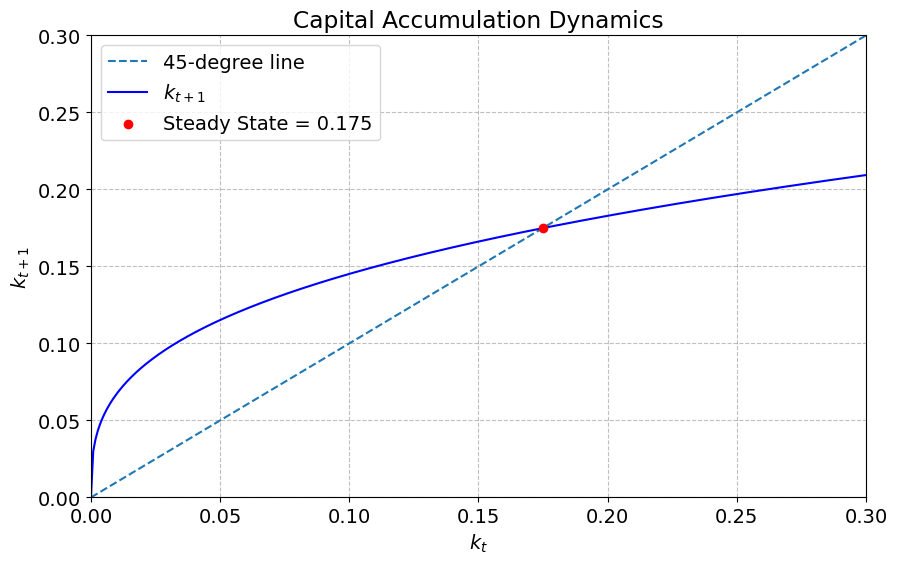

In [50]:
# Defining the values for our set of parameters
rho = 0.05
A = 1.00
alpha = 1/3
n = 0.04
tau = 0.00

# Defining the objective function
obj = lambda k: k - ((A*(1-alpha)*k**alpha)/((1+n)*(2+rho)))

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj, bracket=[1e-10, 10], method='bisect')
k_star = result.root

# Define the range for k_t
k_t = np.linspace(0, 2*k_star, 400)

# Calculate k_t+1 for each k_t
k_t_plus_1 = (A*(1-alpha)*k_t**alpha)/((1+n)*(2+rho))

# Interactive plotting function
def plot_steady_state(steady_state):
    plt.figure(figsize=(10, 6))
    plt.plot(k_t, k_t, label='45-degree line', linestyle='--')
    plt.plot(k_t, k_t_plus_1, label='$k_{t+1}$', color='blue')
    steady_state_y = (A*(1-alpha)*steady_state**alpha)/((1+n)*(2+rho))
    plt.scatter([steady_state], [steady_state_y], color='red', zorder=5, label=f'Steady State = {steady_state:.3f}')
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.title('Capital Accumulation Dynamics')
    plt.legend()
    plt.grid(True)
    plt.ylim([0, 0.3]) 
    plt.xlim([0, 0.3])  
    plt.show()

# Create interactive slider
#interact(plot_steady_state, steady_state=(0.0, 2*k_star, 0.005))

# Display the interactive plot with the initial steady state value
plot_steady_state(k_star)

## 6. <a id='toc6_'></a>[Further analysis](#toc6_)


#### Effect of implementing a Pay As You Go system

In this section, we will use a different approach to solve the model compared to the previous section. Here, we will examine the PAYG-system which we will briefly account for:


In the PAYG-system, the government collects contributions $d_t$ from current young, and pays them out as benefits to current old:
$$
b_t=(1+n)d_t
$$
We assume the the contributions are a fixed fraction of wage ($d_t=\tau w_t$). This yields the budget constraints:
$$
c_{1t}+s_t+d_t=w_t
$$
for young. For old: 
$$
c_{2t+1}=(1+r_{t+1})s_t+(1+n)d_{t+1}
$$
Euler equation is unchanged since the contributions are taken for given. Savings are: 
$$
s_t=(1+n)k_{t+1}
$$


One can derive the closed form expression for individual savings:
$$
s_t=\frac{1}{2+\rho}[(w_t-d_t)-\frac{1+\rho}{r_{t+1}}(1+n)d_{t+1}]
$$
Likewise one can show the equilibrium expression for $k_{t+1}$:
$$
k_{t+1}=\frac{1}{1+\frac{1+\rho}{2+\rho}\frac{(1-\alpha)}{\alpha}\tau}(\frac{1}{(1+n)(2+\rho)}(1-\tau)w_t)
$$

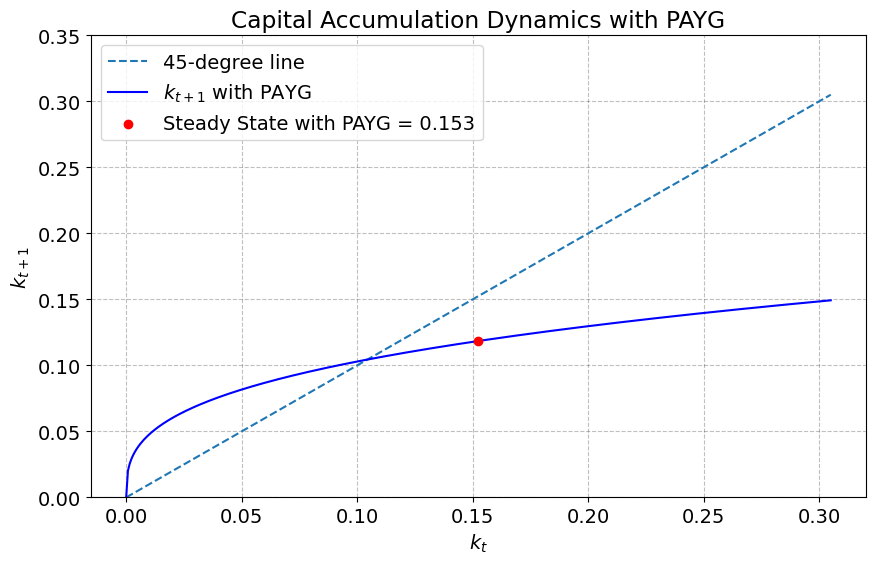

0.15253163956040391

In [52]:
# Defining the values for our set of parameters
rho = 0.05
A = 1.00
alpha = 1/3
n = 0.04
tau = 0.4

# Steady state function with PAYG tax
def steady_state_with_payg(alpha, rho, tau, A, n):
    factor = 1 / (1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau)
    steady_state_k = (A * (1 - alpha) * factor) ** (1 / (1 - alpha)) / ((1 + n) * (2 + rho))
    return steady_state_k

# Calculate the steady state capital with PAYG tax
k_star_payg = steady_state_with_payg(alpha, rho, tau, A, n)

# Define the range for k_t
k_t = np.linspace(0, 2 * k_star_payg, 400)

# Calculate k_t+1 for each k_t
k_t_plus_1_payg = (A * (1 - alpha) * k_t ** alpha) / ((1 + n) * (2 + rho)) * (1 / (1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau))

# Interactive plotting function
def plot_steady_state_payg(steady_state):
    plt.figure(figsize=(10, 6))
    plt.plot(k_t, k_t, label='45-degree line', linestyle='--')
    plt.plot(k_t, k_t_plus_1_payg, label='$k_{t+1}$ with PAYG', color='blue')
    steady_state_y = (A * (1 - alpha) * steady_state ** alpha) / ((1 + n) * (2 + rho)) * (1 / (1 + ((1 + rho) / (2 + rho)) * ((1 - alpha) / alpha) * tau))
    plt.scatter([steady_state], [steady_state_y], color='red', zorder=5, label=f'Steady State with PAYG = {steady_state:.3f}')
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.title('Capital Accumulation Dynamics with PAYG')
    plt.legend()
    plt.grid(True)
    plt.ylim([0, 0.35])  # Adjust y-axis to make the plot clearer
    plt.show()

# Display the interactive plot with the initial steady state value
plot_steady_state_payg(k_star_payg)

k_star_payg

We see that capital falls. From the equilibrium capital accumulation equation previously written up for period $t+1$ we see an inverse relationship between government spendning, $G_t$ and capital accumulation, $k_{t+1}$, such that an increase in $G_t$ leads to a decrease in $k_{t+1}$. 

As it is only the the working-age generation that pay taxes in the OLS model, the tax will exclusively fall on the young generation (to finance government spendning). As a result, the present discounted value (PDV) of lifetime disposable income decreases for the young. 

Hence, the young generation seek to smooth their consumption over their lifetimes. And with a lower PDV of disposable lifetime income, the young generation adjusts by reducing their overall consumption. Given the structure of the Euler equation preseted earlier, to smooth consumption, the young must both reduce their consumption in period $t$ (when young) and in period $t+1$ (when old) - such that they save less today, which leads to a decrease in current savings. 

In the OLG model, savings directly translates to capital accumulation. So when individuals decrease savings, capital accumulation falls as dislayed by the figure above. 



## 7. <a id='toc7_'></a>[Concluding remarks](#toc7_)

In sum, the first figure shows the analytical steady state of approximately 0.175 in the absence of shocks. However, when subjected to an unexpected increase in government spending, achieved through lump-sum taxes levied per worker on the young each period, the capital accumulation decreases accordingly.